In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
os.chdir('..') # go to root dir

# Read Data

## u.data file (Rating Table)

In [2]:
u_data_file = 'data/raw/ml-100k/u.data'

rating = pd.read_csv(u_data_file, sep='\t', header=None)

rating.columns = ['user_id', 'item_id', 'rating', 'timestamp']

In [3]:
rating

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


## u.user file (User Table)

In [4]:
u_user_file = 'data/raw/ml-100k/u.user'

users = pd.read_csv(u_user_file, sep='|', header=None)

users.columns = ['user_id', 'age', 'gender', 'occupation', 'zip_code']

In [5]:
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


## u.item data (Items (Movies) Table)

In [6]:
u_items_file = 'data/raw/ml-100k/u.item'

# columns of u.item
columns = [
    'item_id',
    'movie_title',
    'release_date',
    'video_release_date',
    'IMDb_URL',
    'unknown',
    'Action',
    'Adventure',
    'Animation',
    "Children's",
    'Comedy',
    'Crime',
    'Documentary',
    'Drama',
    'Fantasy',
    'Film-Noir',
    'Horror',
    'Musical',
    'Mystery',
    'Romance',
    'Sci-Fi',
    'Thriller',
    'War',
    'Western',
]

items = pd.read_csv(
    u_items_file,
    sep='|',
    header=None,
    encoding='latin-1',
)

items.columns = columns

In [7]:
items

,item_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data preprocessing

## `rating` Table

In [8]:
rating

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [9]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [10]:
rating.isna().sum()

user_id      0
item_id      0
rating       0
timestamp    0
dtype: int64

In [11]:
# everything is correct, see u.info
rating['user_id'].nunique(), rating['item_id'].nunique()

(943, 1682)

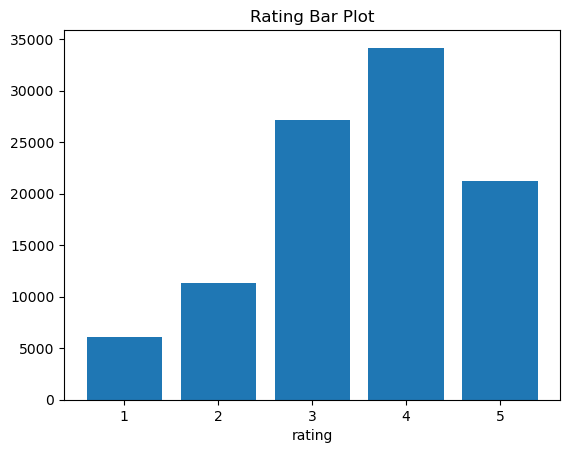

In [12]:
r = rating['rating'].value_counts().sort_index()
plt.bar(r.index, r)
plt.title('Rating Bar Plot')
plt.xlabel('rating')
plt.show()

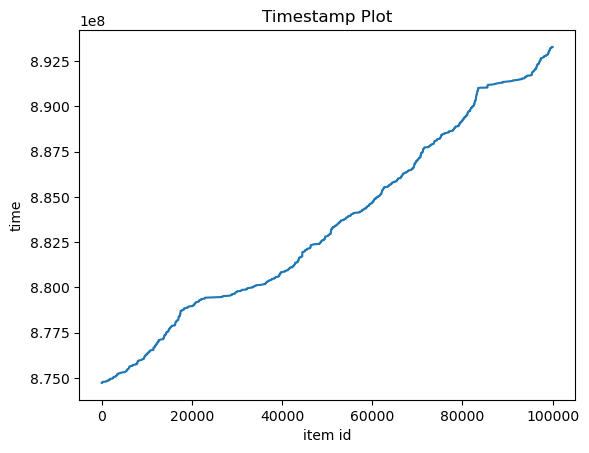

In [13]:
rating['timestamp'].sort_values().reset_index(drop=True).plot()
plt.title('Timestamp Plot')
plt.xlabel('item id')
plt.ylabel('time')
plt.show()

**Results: For rating table everythin seems correct**

In [14]:
rating

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


## `users` Table

In [15]:
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [16]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [17]:
# check for missing values
users.isna().sum()

user_id       0
age           0
gender        0
occupation    0
zip_code      0
dtype: int64

In [18]:
users['user_id'].nunique()

943

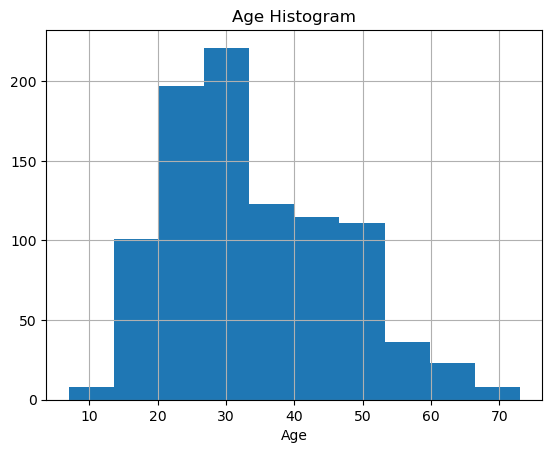

In [19]:
users['age'].hist()
plt.title('Age Histogram')
plt.xlabel('Age')
plt.show()

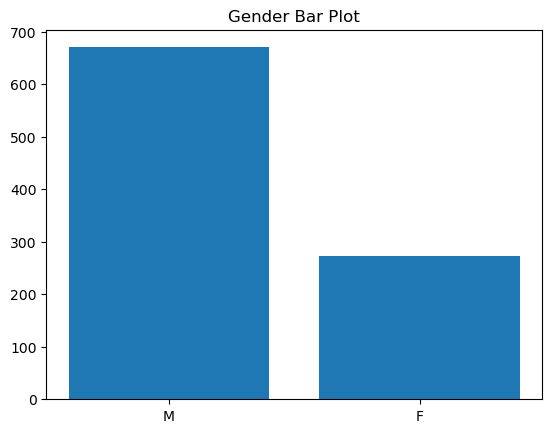

In [20]:
g = users['gender'].value_counts()
plt.bar(g.index, g)
plt.title('Gender Bar Plot')
plt.show()

In [21]:
users['occupation'].value_counts(normalize=True)

student          0.207847
other            0.111347
educator         0.100742
administrator    0.083775
engineer         0.071050
programmer       0.069989
librarian        0.054083
writer           0.047720
executive        0.033934
scientist        0.032874
artist           0.029692
technician       0.028632
marketing        0.027572
entertainment    0.019088
healthcare       0.016967
retired          0.014846
lawyer           0.012725
salesman         0.012725
none             0.009544
homemaker        0.007423
doctor           0.007423
Name: occupation, dtype: float64

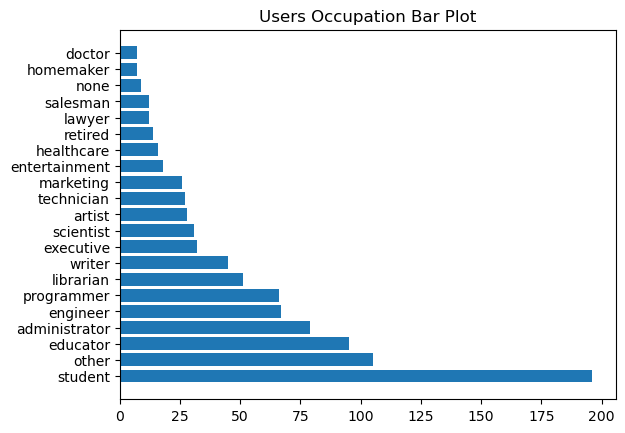

In [22]:
occupations = users['occupation'].value_counts()
plt.barh(occupations.index, occupations)
plt.title('Users Occupation Bar Plot')
plt.show()

In [23]:
users['zip_code'].value_counts()

55414    9
55105    6
55337    5
10003    5
20009    5
        ..
24060    1
55413    1
19149    1
02176    1
77841    1
Name: zip_code, Length: 795, dtype: int64

I will not include `zip_code` in my dataset to train the model. so i will drop it.

`zip_code` does not carry too many information.

In [24]:
users.drop(['zip_code'], axis=1, inplace=True)

In [25]:
users

,user_id,age,gender,occupation
0,1,24,M,technician
1,2,53,F,other
2,3,23,M,writer
3,4,24,M,technician
4,5,33,F,other
...,...,...,...,...
938,939,26,F,student
939,940,32,M,administrator
940,941,20,M,student
941,942,48,F,librarian


### Label Encoding of `gender` and `occupation`

In [26]:
# gender
users['gender'] = users['gender'].replace({'F': 0, 'M': 1})

In [27]:
users

,user_id,age,gender,occupation
0,1,24,1,technician
1,2,53,0,other
2,3,23,1,writer
3,4,24,1,technician
4,5,33,0,other
...,...,...,...,...
938,939,26,0,student
939,940,32,1,administrator
940,941,20,1,student
941,942,48,0,librarian


In [28]:
users = pd.get_dummies(users)

In [29]:
users

,user_id,age,gender,occupation_administrator,occupation_artist,occupation_doctor,occupation_educator,occupation_engineer,occupation_entertainment,occupation_executive,...,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer
0,1,24,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,53,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3,23,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,24,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,33,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,939,26,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
939,940,32,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
940,941,20,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
941,942,48,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## `items` Table

In [30]:
items

,item_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   item_id             1682 non-null   int64  
 1   movie_title         1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   IMDb_URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children's          1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

In [32]:
items.isna().sum()

item_id                  0
movie_title              0
release_date             1
video_release_date    1682
IMDb_URL                 3
unknown                  0
Action                   0
Adventure                0
Animation                0
Children's               0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Fantasy                  0
Film-Noir                0
Horror                   0
Musical                  0
Mystery                  0
Romance                  0
Sci-Fi                   0
Thriller                 0
War                      0
Western                  0
dtype: int64

In [33]:
# dealing with nan's

## no need for `video_release_date` columns, all nan's
items.drop(['video_release_date'], axis=1, inplace=True)

items['release_date'] = items['release_date'].fillna('')
items['IMDb_URL'] = items['IMDb_URL'].fillna('')

In [34]:
# no nan values anymore
items.isna().sum().sum()

0

# Save preprocessed tables

In [35]:
root_dir = 'data/interim/'

# save rating table
rating.to_csv(root_dir + 'rating.csv', index=False)

# save users table
users.to_csv(root_dir + 'users.csv', index=False)

# save items table
items.to_csv(root_dir + 'items.csv', index=False)